# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 7</span>

## Simulazione Monte Carlo di un fluido con potenziale di interazione Lennard-Jones(LJ) nell'Ensemble Canonico NVT

### Obiettivo


In questa settima esercitazione viene discussa la simulazione di un fluido semplice ($N=108$ particelle in un box cubico con condizioni periodiche al contorno **Pbc**) con un potenziale di interazione del tipo **Lennard-Jones**, analogamente alla *esercitazione 4*, rispettivamente nelle tre fasi termodinamiche solido, liquido e gas nell'**ensemble canonico** a fissato numero di particelle $N$, volume del box $V$ e temperatura $T$ (**NVT**) con una simulazione **Monte Carlo**, quindi con un algoritmo di **Metropolis** che costruisce e simula una catena di Markov adeguata a realizzare, asintoticamente, il campionamento del **peso statistico di Boltzmann**, a differenza dell'ensemble microcanonico **NVE** che, nella esercitazione 4, veniva simulato con con un codice di **dinamica molecolare** producendo nuove configurazioni integrando e risolvendo le equazioni del moto ad energia costante.


### Esercizio 7.01

In questa prima fase viene modificato il codice MC_NVT affinchè sia in grado di, innanzitutto, **equilibrare** il sistema e  stampare su opportuni file di output $M=5\times 10^5$ valori istantanei di **energia potenziale per particella** $\frac{U}{N}$ e di **pressione** $P$.

Per soddisfare tale richiesta viene inserita la possibilità all'inizio dell'esecuzione del programma di scegliere se effetuare la simulazione vera e propria (*answer==2*) che restituisce i valori di aspettazione con le relative incertezze calcolate con il **blocking method** oppure di eseguire l'equilibrazione (*answer==1*) o la stampa su file dei valori istantanei mediante una routine *Print_Istant(int)*. 

Le condizioni termodinamiche investigate sono le seguenti (analoghe all'*esercitazione 4*) con il simbolo $\star$ che indica che le grandezze sono espresse in unità ridotte di LJ:

- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Nel file **input.dat** vengono sovrascritti (con opportune istruzioni contenute nel makefile *input_(phase)*) i file di input delle tre rispettive fasi (*input.(pahse)*) che contengono il set di parametri che identificano le tre fasi sopra elencate, il numero di particelle costituenti il sistema $N=108$, il numero di steps MC per l'equilibrazione, il numero di blocchi in cui è divisa la simulazione, gli steps MC per ciascun blocco e l'ampiezza *delta*. La configurazione di partenza è quella di un reticolo cristallino fcc (comando makefile *import_fcc*). La lettura ( mediante la routine *Input()*) di questo file costituisce l'inizializazione del sistema e prepara il programma ad eseguire la simulazione.

L'ultimo parametro di input, sopra citato, indica l'ampiezza della mossa proposta dall'algoritmo di Metropolis assumendo di usare una probabilità transizione tentativo $T(\vec {x_{new}},\vec{x_{old}})$ uniforme su ciascuna delle tre coordinate che individuano la posizione di un singolo grado di libertà del sistema, inoltre, il suo valore deve essere scelto in modo tale che il **tasso di accettazione** soddisfi la regola empirica del $50$%. La scelta per la simulazione delle tre fasi termodinamiche è qui di seguito riportata:

- fase solida: $ delta^\star = 0.11 $ 
- fase liquida: $ delta^\star = 0.2 $ 
- fase gassosa: $ delta^\star = 6.2 $

Si osservi che per la fase gassosa il parametro dell mossa è molto più elevato delle altre fasi e, nonostante questo, riesce a soddisfare solo una probabilità di accettazione  $A(\vec {x_{new}},\vec{x_{old}}) = 62$%. Questo comportamento è riconducibile alla natura della fase gassosa, essa infatti rappresenta un sistema molto diluito dove i gradi di libertà si trovano molto distanti tra di loro e l'interazione tra di essi è molto meno significativa. La mossa tentativo, pur provando a modificare la configurazione della singola particella non porta ad un significativo cambiamento della sua energia di interazione (routine *Bolzmann()* nel codice) con le altre particelle all'interno del box di simulazione, di conseguenza la probabilità di accettazione, per come è definita, rimane piuttosto elevata. Inoltre si ricordi che non è possibile salire con l'ampiezza della mossa oltre metà della taglia del box di simulazione ($L_{gas}^\star \simeq 13$) perchè a quel punto entrerebbero in gioco le Pbc. 


La fase di equilibrazione viene effettuata con $N_{steps}=10^4$  MC verificando che i valori istantanei di energia potenziale e pressione (stampati su *output.(grandezza).equi_(phase)*) si stabilizzino nel corso della breve simulazione. Le configurazioni finali ottenute (caricate in *config.final*) vengono salvate con un comando del makefile (*save_(phase)*) in modo da potere sempre essere riutilizzate per i futuri test e simulazioni partendo dalle configurazioni in cui il sistema è **equilibrato**.

Qui di seguito vengono riporati i grafici che mostrano l'equilibrazione del sistema, ossia i valori delle due grandezze in esame in funzionde dei time steps MC di equilibrazione.


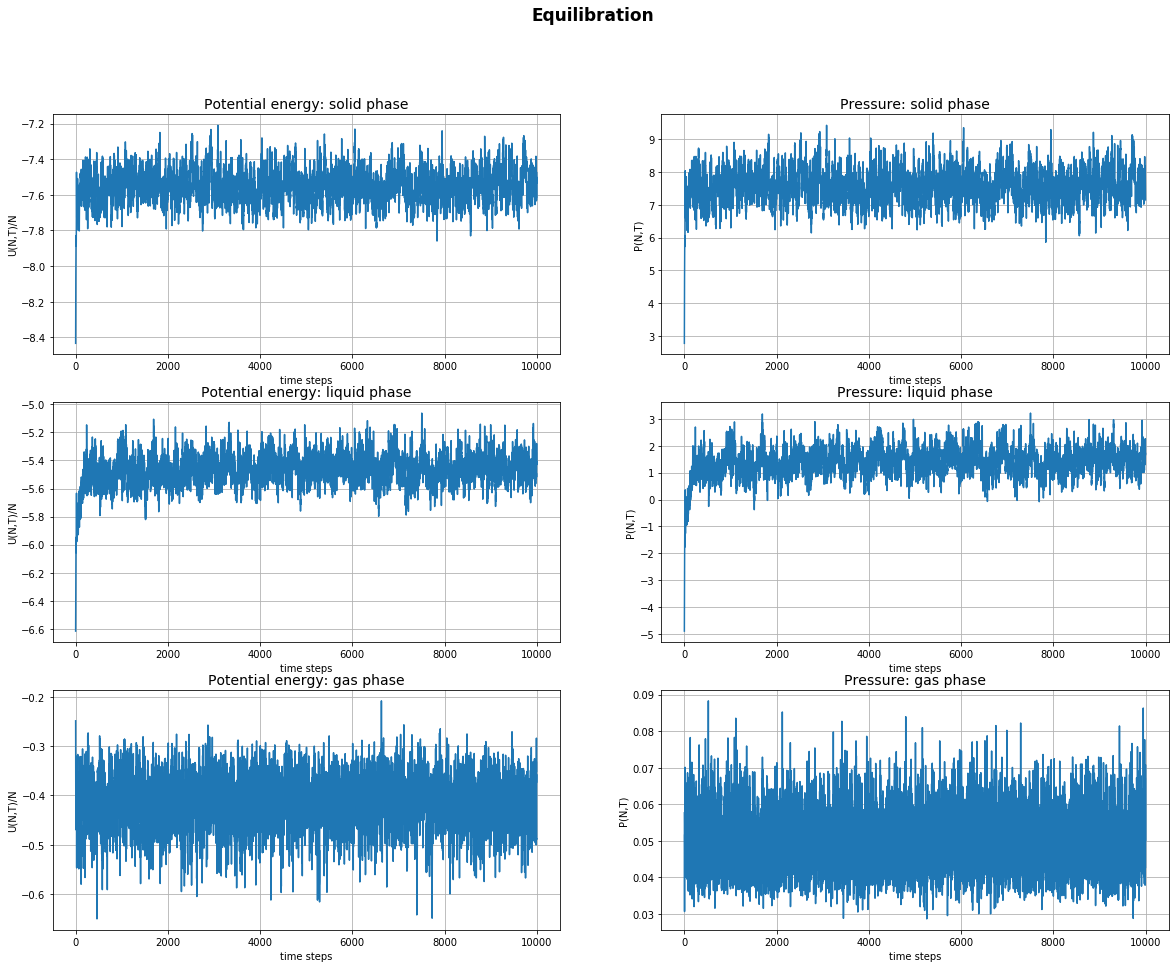

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#solid phase
steps_equi_solid, epot_equi_solid= np.loadtxt("Results/output.epot_equi_solid", usecols=(0,1), unpack='true')
steps_equi_solid, pres_equi_solid = np.loadtxt("Results/output.pres_equi_solid", usecols=(0,1), unpack='true')
#liquid phase
steps_equi_liquid, epot_equi_liquid = np.loadtxt("Results/output.epot_equi_liquid ", usecols=(0,1), unpack='true')
steps_equi_liquid, pres_equi_liquid = np.loadtxt("Results/output.pres_equi_liquid ", usecols=(0,1), unpack='true')
#gas phase
steps_equi_gas, epot_equi_gas = np.loadtxt("Results/output.epot_equi_gas ", usecols=(0,1), unpack='true')
steps_equi_gas, pres_equi_gas = np.loadtxt("Results/output.pres_equi_gas ", usecols=(0,1), unpack='true')

fig=plt.figure(figsize=(20,15))
plt.suptitle("Equilibration", fontsize='17', weight='bold')

# U/N solid equilibration
plt.subplot(321)
plt.plot(steps_equi_solid,epot_equi_solid)
plt.title("Potential energy: solid phase",size='14')
plt.xlabel('time steps')
plt.ylabel('U(N,T)/N')
plt.grid(True)
# P solid equilibration
plt.subplot(322)
plt.plot(steps_equi_solid,pres_equi_solid)
plt.title("Pressure: solid phase",size='14')
plt.xlabel('time steps')
plt.ylabel('P(N,T)')
plt.grid(True)
# U/N liquid equilibration
plt.subplot(323)
plt.plot(steps_equi_liquid,epot_equi_liquid)
plt.title("Potential energy: liquid phase",size='14')
plt.xlabel('time steps')
plt.ylabel('U(N,T)/N')
plt.grid(True)
# P liquid equilibration
plt.subplot(324)
plt.plot(steps_equi_liquid,pres_equi_liquid)
plt.title("Pressure: liquid phase",size='14')
plt.xlabel('time steps')
plt.ylabel('P(N,T)')
plt.grid(True)
# U/N gas equilibration
plt.subplot(325)
plt.plot(steps_equi_gas,epot_equi_gas)
plt.title("Potential energy: gas phase",size='14')
plt.xlabel('time steps')
plt.ylabel('U(N,T)/N')
plt.grid(True)
# P gas equilibration
plt.subplot(326)
plt.plot(steps_equi_gas,pres_equi_gas)
plt.title("Pressure: gas phase",size='14')
plt.xlabel('time steps')
plt.ylabel('P(N,T)')
plt.grid(True)

plt.show()



- Dai plots rappresentati si osserva che il sistema raggiunge l'equilibrio in poche centinaia di steps MC per tutte e tre le fasi simulate.

Dal sistema in equilibrio viene eseguita la stampa degli $M$ valori istantanei (*output.(grandezza).ac_(phase)*) che vengono usati per effettuare due differenti analisi sull'incertezza statistica nei calcoli MC,  che consentono di stimare , in ultima istanza, di quale lunghezza dovranno essere i blocchi nella simulazione effettiva affinchè i risultati finali possano ritenersi **statisticamente** attendibili e precisi.

In [4]:
#Read the data

#solid phase
epot_iv_solid = np.loadtxt("Results/output.epot_ac_solid", usecols=(0), unpack='true')
pres_iv_solid = np.loadtxt("Results/output.pres_ac_solid", usecols=(0), unpack='true')
#liquid phase
epot_iv_liquid = np.loadtxt("Results/output.epot_ac_liquid", usecols=(0), unpack='true')
pres_iv_liquid = np.loadtxt("Results/output.pres_ac_liquid", usecols=(0), unpack='true')
#gas phase
epot_iv_gas = np.loadtxt("Results/output.epot_ac_gas", usecols=(0), unpack='true')
pres_iv_gas = np.loadtxt("Results/output.pres_ac_gas", usecols=(0), unpack='true')

1) **Analisi della funzione di autocorrelazione ($AC_{[grandezza]}(t)$)**

Nel caso di una catena di Markov MC si può calcolare la funzione di autocorrelazione solo su un insieme finito di punti o meglio di step MC discreti. In questo caso la sua espressione per una qualsiasi proprietà di interesse g del sistema è la seguente:
$$
\chi(t) = \frac{\frac{1}{t_{max}-t} \sum_{t' = 0}^{t_{max}-t} g(t')g(t'+t) - \frac{1}{t_{max}-t} \sum_{t' = 0}^{t_{max}-t} g(t') \times \frac{1}{t_{max}-t} \sum_{t' = 0}^{t_{max}-t} g(t'+t)}{\frac{1}{t_{max}} \sum_{t' = 0}^{t_{max}} g^2(t') - {\sum_{t' = 0}^{t_{max}} g(t') }^2}
$$
dove $t_{max}$ indica il numero totale di steps MC.

Essa ci dà un'informazione **quantitativa** di quanto le configurazioni prodotte in successione dall'algoritmo di Metropolis siano correlate tra di loro in funzione del numero di steps MC che le separano.

Si aspetta che per misure di valori di una determinata grandezza associate a configurazioni separate da un numero molto basso di steps temporali la funzione di correlazione presenti dei valori positivi ed elevati, in quanto i valori della variabile in esame sono molto simili, al contrario, su scale di tempo maggiori, le misure dovrebbero essere, con buone probabilità, quasi completamente scorrelate e mostrare un valore della $AC_{[g]}(t)$ praticamente nullo.

Il suo andamento, che dovrebbe cadere (approssimativamente) come un **esponenziale** ($\chi(t) \simeq e^{\frac{-t}{t_{corr}}}$) su scale di tempi elevate, fornisce una stima del **tempo di correlazione** ($t_{corr}$)  (ossia il tempo scala dell'esponenziale) che rappresenta il tempo che impiega il sistema per generare configurazioni significativamente diverse da quella iniziale. Tale grandezza consente di stimare quanto devono essere lunghi i blocchi della simulazione affinchè il numero di steps per blocco sia sufficientemente grande da evitare configurazioni troppo correlate. Ad una distanza di un $t_{corr}$, peoò, i campioni osservati mostrano ancora un significativo valore di $AC_{[g]}(t)$.

Quindi i time steps necessari affinchè due campioni possano considerarsi **statisticamente indipendenti** devono essere sigificativamente maggiori della stima di $t_{corr}$ per produrre configurazioni scorrelate. Per convenzione si ritengono sufiicienti $2 t_{corr}$.  Per una simulazione di $t_{max}$ steps MC il numero di campionamenti indipendeti utile per calcolare le medie di ensemble è pari a $N \simeq \frac{t_{max}}{t_{corr}}$.

Questo calcolo è stato implementato nella prossime celle di tipo code per entrambe le grandezze $\frac{U}{N}$ e $P$ per tutte e tre le fasi.

In [6]:
def autocorrelation(x,t_max):
    x_ave=0
    x2_ave=0
    for t in range(t_max):
        x_ave+=x[t]
        x2_ave+=x[t]*x[t]        
    x_ave=x_ave/(t_max)
    x2_ave=x2_ave/(t_max)
    var=x2_ave-x_ave*x_ave
    ac=np.zeros(t_max) 
    for t in range(t_max):
        sum_1=0
        sum_2=0 
        sum_3=0
        for j in range(0,t_max-t):
            sum_1+=x[j]*x[j+t]
            sum_2+=x[j+t]
            sum_3+=x[j]
        ac[t]=((sum_1/(t_max-t))-(sum_3/(t_max-t))*(sum_2/(t_max-t)))/(var)
    
    return ac

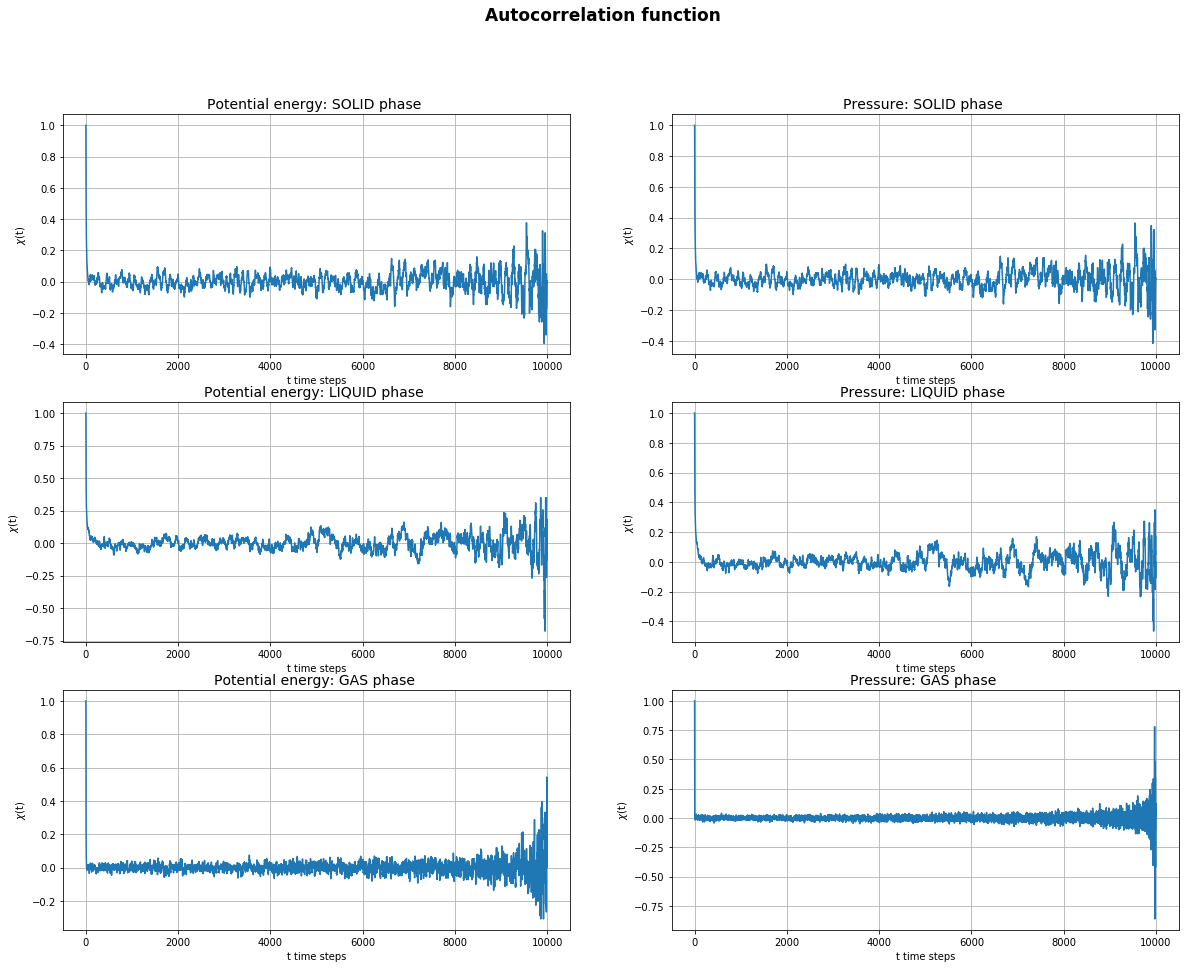

In [7]:
t_max = 10000
#solid phase
ac_epot_solid=autocorrelation(epot_iv_solid,t_max)
ac_pres_solid=autocorrelation(pres_iv_solid,t_max)
#liquid phase
ac_epot_liquid=autocorrelation(epot_iv_liquid,t_max)
ac_pres_liquid=autocorrelation(pres_iv_liquid,t_max)
#gas phase
ac_epot_gas=autocorrelation(epot_iv_gas,t_max)
ac_pres_gas=autocorrelation(pres_iv_gas,t_max)


fig=plt.figure(figsize=(20,15))
plt.suptitle("Autocorrelation function", fontsize='17', weight='bold')


# U/N autocorrelation solid
plt.subplot(321)
plt.plot(range(t_max),ac_epot_solid)
plt.title("Potential energy: SOLID phase ",size='14')
plt.xlabel('t time steps')
plt.ylabel('$\chi$(t)')
plt.grid(True)

# P autocorrelation solid
plt.subplot(322)
plt.plot(range(t_max),ac_pres_solid)
plt.title("Pressure: SOLID phase ",size='14')
plt.xlabel('t time steps')
plt.ylabel('$\chi$(t)')
plt.grid(True)

# U/N autocorrelation liquid
plt.subplot(323)
plt.plot(range(t_max),ac_epot_liquid)
plt.title("Potential energy: LIQUID phase ",size='14')
plt.xlabel('t time steps')
plt.ylabel('$\chi$(t)')
plt.grid(True)

# P autocorrelation liquid
plt.subplot(324)
plt.plot(range(t_max),ac_pres_liquid)
plt.title("Pressure: LIQUID phase ",size='14')
plt.xlabel('t time steps')
plt.ylabel('$\chi$(t)')
plt.grid(True)

# U/N autocorrelation gas
plt.subplot(325)
plt.plot(range(t_max),ac_epot_gas)
plt.title("Potential energy: GAS phase ",size='14')
plt.xlabel('t time steps')
plt.ylabel('$\chi$(t)')
plt.grid(True)

# P autocorrelation gas
plt.subplot(326)
plt.plot(range(t_max),ac_pres_gas)
plt.title("Pressure: GAS phase ",size='14')
plt.xlabel('t time steps')
plt.ylabel('$\chi$(t)')
plt.grid(True)


plt.show()


-  Nei plots sopra riportati si osserva una **rapida** caduta su un valore nullo nei primissimi step MC della simulazione permettendo di stimare il $t_{corr} \simeq 100$. Di conseguenza è possibile concludere che la lunghezza dei blocchi deve soddisfare la condizione $L \gg t_{corr} \simeq 100$. Si noti inoltre che per ragioni di tempi computazionali la determinazione di $\chi(t)$ è stata effettuata considerando come numero di configurazioni campione le prime $t_{max}=10000$ dei valori istantanei contenuti nei relativi files. La significativa oscillazione negli ultimi step MC è riconducibile al fatto che quando $t$ approssima $t_{max}$ i contributi alle sommatorie nell'equazione riportata in precedenza ($\chi(t)$) sono pochi e le incertezze statistiche di $\chi(t)$, dovute alle fluttuazioni casuali della grandezza in esame, crescono notevolmente. Anche per questo motivo il valore di  $t_{max}$ deve essere sufficentemente grande, in modo che in corrispondenza di tempi dell'ordine del tempo di correlazione i valori della $\chi(t)$ non siano disturbati da queste non trascurabili fluttuazioni di coda.


- Si osserva che nella simulazione della fase gassosa la funzione di autocorrelazione decade più rapidamente che nella fase liquida e solida. Questo significa che il moto più disordinato della particelle porta le configurazioni a scorrellarsi più rapidamente e la lunghezza L dei blocchi potrà essere scelta con un valore minore.

**N.B.:** il tempo di esecuzione dello script python necessita di qualche minuto. 

2) **Analisi delle incertezze statistiche in funzione del numero di passi MC per blocco L**

Nelle celle di code riportate qui di seguito è implementato il codice Python che realizza il plot delle stime delle incertezze statistiche dei valori di aspettazione delle grandezze $\frac{U}{N}$ e $P$ calcolate a partire dalle $M$ misure raggruppate in blocchi (*blocking method*) di dimensioni crescenti in funzione del numero di step MC costituenti il singolo blocco da $L=M/N=10$ fino a $L=5\times 10^3$, essendo $N$ il numero di blocchi in cui è suddivisa la simulazione.

Le aspettative teoriche prevedono che si osservino delle stime di incertezze statistiche **sottostimate** per valori di L bassi (numero di blocchi elevato) e aumentando progressivamente la lunghezze dei blocchi si raggiunga una **saturazione** dell'errore, infatti questo possiede un limite superiore, indice che una ulteriore crescita di L non modificherebbe le stime dell'incertezza a parità di dati generati. 

IL valore di L per cui si registra la saturazione rappresenta il valore ottimale della lunghezza del singolo blocco per la simulazione del sistema LJ affinchè i valori medi delle grandezze estratti da ciascun blocco siano sufficientemente scorrelati e sia garantita l'applicabilità dl Teorema del Limite Centrale per stimare le incertezze statistiche. 

**N.B.**: Nel codice vengono presi in considerazione (naturalmente) solo i valori di L **interi**, ossia tutti i possibili **divisori** di M nell'intervallo stabilito.


Qui di seguito vengono riportati tutti i risultati ottenuti per l'analisi dell'incertezza statistica per tutte e tre le fasi simulate.

In [8]:
# blocking method
def blocking_method(r,L):   # r = data block   L = block size
    ave_sum2=0
    nmis = len(r)
    L=int(nsteps) # l = steps' number for each block
    N=int(nmis/L) # N = block number
    ave=np.zeros(N)
    err_prog = np.zeros(N)
    for iblock in range(N):
        for istep in range(L):
            ave[iblock]+=r[istep+iblock*L]        
        ave[iblock]=ave[iblock]/L
        ave_sum2+=ave[iblock]*ave[iblock]
    err_prog =math.sqrt((ave_sum2/N-ave.mean()*ave.mean())/(N-1))
    return err_prog

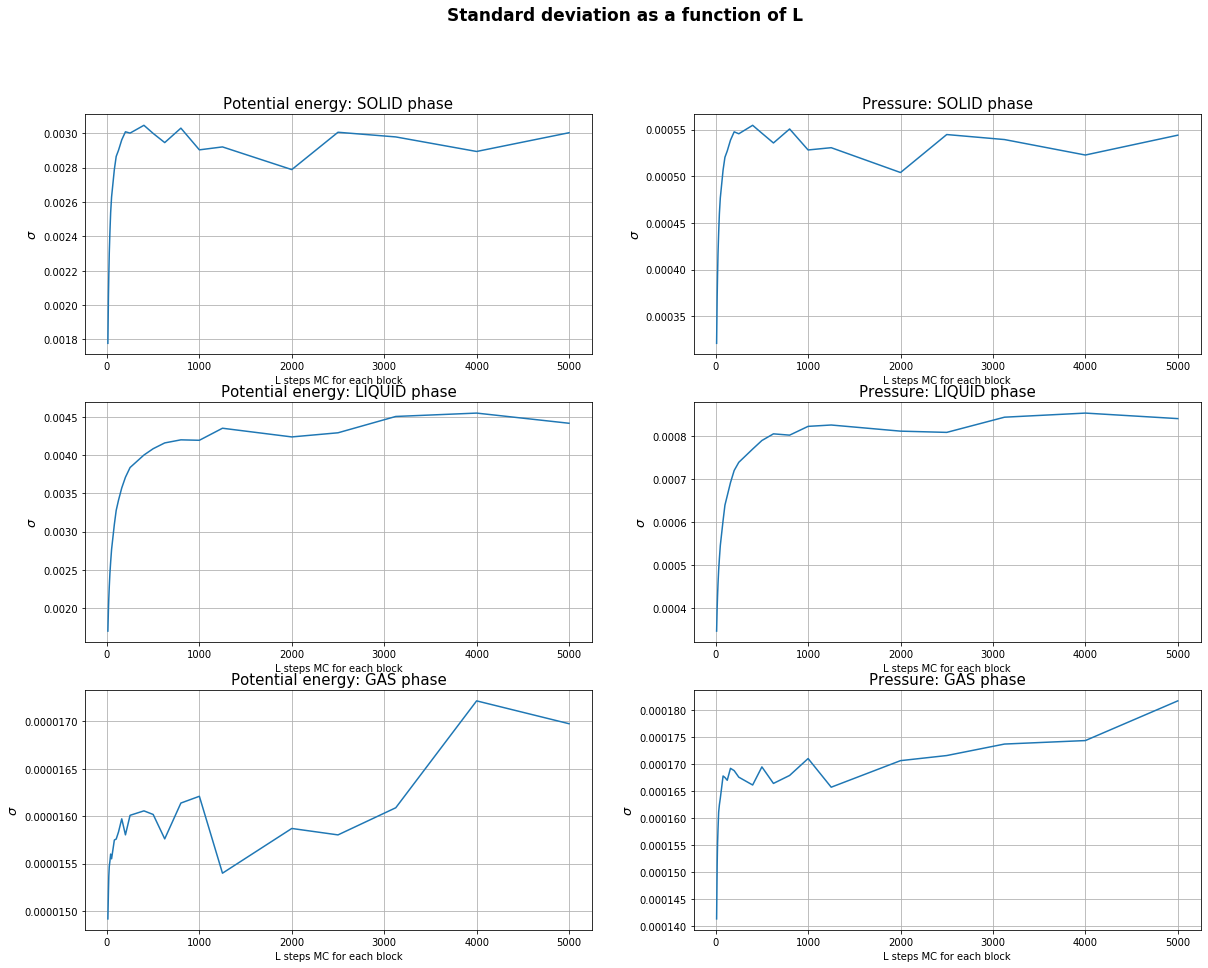

In [9]:
nmis = epot_iv_liquid.size

L_min = 10 # minimum size of each block
L_max = 5000 # maximum size of each block
ndiv=0 #numero divisori
for i in range(L_min, L_max+1):
    if(nmis%i==0):
        ndiv+=1
range_nsteps=np.zeros(ndiv)
b=0 #index nsteps
for i in range(L_min, L_max+1):
    if(nmis%i==0):
        range_nsteps[b]=int(i)
        b+=1
        
#prepare the array     
epot_error_solid=np.zeros(range_nsteps.size) #statisical uncertainties of potential energy
pres_error_solid=np.zeros(range_nsteps.size) #statisical uncertainties of pressure
epot_error_liquid=np.zeros(range_nsteps.size) #statisical uncertainties of potential energy
pres_error_liquid=np.zeros(range_nsteps.size) #statisical uncertainties of pressure
epot_error_gas=np.zeros(range_nsteps.size) #statisical uncertainties of potential energy
pres_error_gas=np.zeros(range_nsteps.size) #statisical uncertainties of pressure

#blocking method
j=0
for nsteps in range_nsteps:
    L=int(nsteps) # l = steps' number for each block
    epot_error_solid[j]=blocking_method(pres_iv_solid,L)
    pres_error_solid[j]=blocking_method(epot_iv_solid,L)
    epot_error_liquid[j]=blocking_method(pres_iv_liquid,L)
    pres_error_liquid[j]=blocking_method(epot_iv_liquid,L)
    epot_error_gas[j]=blocking_method(pres_iv_gas,L)
    pres_error_gas[j]=blocking_method(epot_iv_gas,L)
    j+=1

#draw the plots
fig=plt.figure(figsize=(20,15))
plt.suptitle("Standard deviation as a function of L",fontsize='17', weight='bold')

plt.subplot(321)
plt.plot(range_nsteps, epot_error_solid)
plt.title('Potential energy: SOLID phase',size='15')
plt.xlabel('L steps MC for each block')
plt.ylabel('$\sigma$',size='13')
plt.grid(True)

plt.subplot(322)
plt.plot(range_nsteps, pres_error_solid)
plt.title('Pressure: SOLID phase',size='15')
plt.xlabel('L steps MC for each block')
plt.ylabel('$\sigma$',size='13')
plt.grid(True)

plt.subplot(323)
plt.plot(range_nsteps, epot_error_liquid)
plt.title('Potential energy: LIQUID phase',size='15')
plt.xlabel('L steps MC for each block')
plt.ylabel('$\sigma$',size='13')
plt.grid(True)

plt.subplot(324)
plt.plot(range_nsteps, pres_error_liquid)
plt.title('Pressure: LIQUID phase',size='15')
plt.xlabel('L steps MC for each block')
plt.ylabel('$\sigma$',size='13')
plt.grid(True)

plt.subplot(325)
plt.plot(range_nsteps, epot_error_gas)
plt.title('Potential energy: GAS phase',size='15')
plt.xlabel('L steps MC for each block')
plt.ylabel('$\sigma$',size='13')
plt.grid(True)

plt.subplot(326)
plt.plot(range_nsteps, pres_error_gas)
plt.title('Pressure: GAS phase',size='15')
plt.xlabel('L steps MC for each block')
plt.ylabel('$\sigma$',size='13')
plt.grid(True)

plt.show()

- Gli andamenti sopra riportati mostrano che il **livello di saturazione** dell'incertezza statistica per il fluido LJ simulato nella tre differenti fasi viene raggiunto dopo alcune centinaia di steps MC. 


- In particolare si osserva che la fase liquida è quella che necessita un numero maggiore di passi per blocco ($L_{liq} \simeq 1000$) afinchè l'errore del calcolo MC non sia sottostimato e i valori medi estratti da ciascun blocco siano statisticamente indipendenti e sufficientemente scorrelati.


- Nella simulazione della fase gassosa invece si osserva un risultato coerente con quello dedotto in precedenza dai grafici dell'autocorrelazione, ossia il moto caotico scorrela rapidamente le configurazioni prodotte dal Metropolis e la lunghezza dei blocchi potrà essere scelta minore.

**N.B.:** il tempo di esecuzione dello script python necessita di qualche secondo. 

### Esercizio 7.02

In questa seconda parte viene inserito nel codice NVT l'algoritmo che permette di calcolare la **funzione di distribuzione radiale** $g(r)$ che è una funzione che dipende solo dal **modulo** della distanza relativa a due soli gradi di libertà (questo vale in un **fluido omogeneo**) e per questo motivo è anche detta funzione di distribuzione a coppie. Tale funzione di distribuzione per le posizioni atomiche appartiene all'insieme delle **quantità strutturali** che caratterizzano un fluido monoatomico semplice.

Il significato fisico di questa funzione di distribuzione radiale coincide con la probabilità di trovare una coppia di particelle del sistema ad una distanza $r$ relativamente alla probabilità attesa per una distribuzione completamente casuale, quindi quella di un **gas ideale**, alla stessa densità e distanza. Essa quindi ci fornisce molte informazioni sulla **struttura** atomica del fluido in esame.

Per implementare il calcolo, a livello *pratico*, nel codice viene suddiviso l'intervallo $[0;L/2]$ , con $L$ lato del box della simulazione in cui è racchiuso il sistema, in $n_{bins} = 100$, ossia cento intervallini di larghezza ${bin}_{size} = \frac{L}{2}\frac{1}{n{bins}}$. Ciascun bin corrisponde ad un opportuno intervallo radiale all'interno dei quali cade la distanza che separa due particelle all'interno del box durante la simulazione. All'interno della routine *Measure()*, nel doppio ciclo sopra tutte le coppie possibili di particelle, viene valuatata la distanza $dr$ per ogni coppia di particelle e quando questa rientra in uno degli intervallini il bin corrispondente viene aumentato di due unità come se venisse *riempito* un **istogramma**. Alla fine della simulazione, come mostrato a lezione, i valori ottenuti in ogni bin dell'istogramma vengono normalizzati dividendoli per la costante $Cost=\rho N \Delta V(r)$ con $\Delta V(r) = \frac{4}{3}\pi[(r+dr)^3-r^3]$.

Nel file *output.gave_solid(liquid/gas)_NVT* vengono salvati i valori medi finali di $g(r)$ con le realtive incertezze statistiche ottenute tenendo conto dei valori progressivi accumulati ad ogni blocco. Nel file *output.gofr_solid(liquid/gas)_NVT* vengono salvati invece i valori medi con gli errori per ciascun blocco per tenere traccia di eventuali errori sistematici che influenzano l'implementazione dell'algoritmo da corregere e per verificare che in media l'andamento sia il medesimo.

Gli andamenti della funzione di di distribuzione radiale in funzione della distanza radiale tra le particelle, con $r \in \left[ 0; L/2\right]$, sono riportati qui di seguito per tutte e tre le condizioni termodinamiche studiate per il sistema modellizzato con potenziale LJ.


**N.B.**: la funzione di distribuzione radiale non è solo utile per appronfondire la struttura del fluido, ma consente di calcolare la **media di ensemble** di qualsiasi **funzione a coppia delle coordinate**, come l'energia potenziale del sistema.
Tramite tali espressioni è possibile anche stimare le **correzioni di coda**, ossia i contributi a lungo raggio trascurati in una simulazione che calcola un potenziale con un **cutoff sferico** a distanza $r_c$, supponendo generalmente la $g(r)=1$ per raggi superiori a quello di cutoff. 

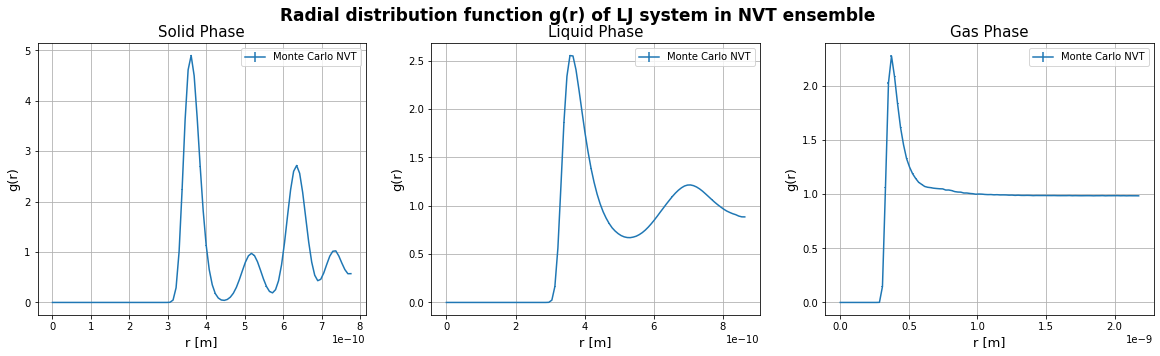

In [10]:
sigma = 0.34*(10**(-9)) # m , unità di lunghezza LJ

r_solid_NVT,gdir_solid_NVT,error_gdir_solid_NVT = np.loadtxt("Results/output.gave_solid_NVT", usecols=(0,1,2), unpack='true')
r_liquid_NVT,gdir_liquid_NVT,error_gdir_liquid_NVT = np.loadtxt("Results/output.gave_liquid_NVT", usecols=(0,1,2), unpack='true')
r_gas_NVT,gdir_gas_NVT,error_gdir_gas_NVT = np.loadtxt("Results/output.gave_gas_NVT", usecols=(0,1,2), unpack='true')
 

fig1=plt.figure(figsize=(20,5))
plt.suptitle("Radial distribution function g(r) of LJ system in NVT ensemble", fontsize=17, weight = 'bold')

plt.subplot(131)
plt.title("Solid Phase", size=15)
plt.errorbar(r_solid_NVT*sigma,gdir_solid_NVT,yerr=error_gdir_solid_NVT,label = "Monte Carlo NVT")
plt.xlabel('r [m]', size=13)
plt.ylabel('g(r)', size=13)
plt.grid(True)
plt.legend()
                                                       
plt.subplot(132)
plt.title("Liquid Phase", size=15)
plt.errorbar(r_liquid_NVT*sigma,gdir_liquid_NVT,yerr=error_gdir_liquid_NVT,label = "Monte Carlo NVT")
plt.xlabel('r [m]', size=13)
plt.ylabel('g(r)', size=13)
plt.grid(True)
plt.legend()
                                                       
plt.subplot(133)
plt.title("Gas Phase", size=15)
plt.errorbar(r_gas_NVT*sigma,gdir_gas_NVT,yerr=error_gdir_gas_NVT,label = "Monte Carlo NVT")
plt.xlabel('r [m]', size=13)
plt.ylabel('g(r)', size=13)
plt.grid(True)
plt.legend()

plt.show()

- Innanzitutto si noti che le distanze sull'asse delle ascisse sono state riporate in unità del **Sistema Internazionale**


- I risultati trovati sull'andamento della $g(r)$ sono ragionevoli: si noti che le particelle hanno una probabilità nulla di trovarsi a distanze ravvicinate a causa del termine di **core** del potenziale LJ che impedisce alle particelle di sovrapporsi. A distanze maggiori invece tale probabilità oscilla intorno al valore 1 , come se le particelle si disponessero in **shell** concetriche attorno ad una particella che si trova nell'origine del sistema di riferimento considerato. Le oscilazioni nella fase solida sono le maggiori ed indicano la presenza dei primi vicini nella struttura cristallina reticolare. 


- Si osservi che più la fase simulata è simile a quella di un gas ideale (da sx verso dx), più il valore della funzione di distribuzione radiale tende ad assumere il valore 1, in perfetta coerenza con il significato fisico di questa funzione. In particolare per la fase gassosa dell'Argon, a grandi distanze , la differenza fra essa e un gas ideale risulta praticamente annullata.

### Esercizio 7.03

Nella terza parte dell'esercitazione viene inserito l'algoritmo per il calcolo della $g(r)$ nel codice di dinamica molecolare usato nell'*esercitazione 4* per simulare un sistema LJ nell'ensemble microcanonico NVE risolvendo le equazioni del moto.
L'inserimento si realizza con gli stessi passaggi descritti nella sezione precedente. 

Anche in questo caso, per completezza, riportiamo i tre plots.

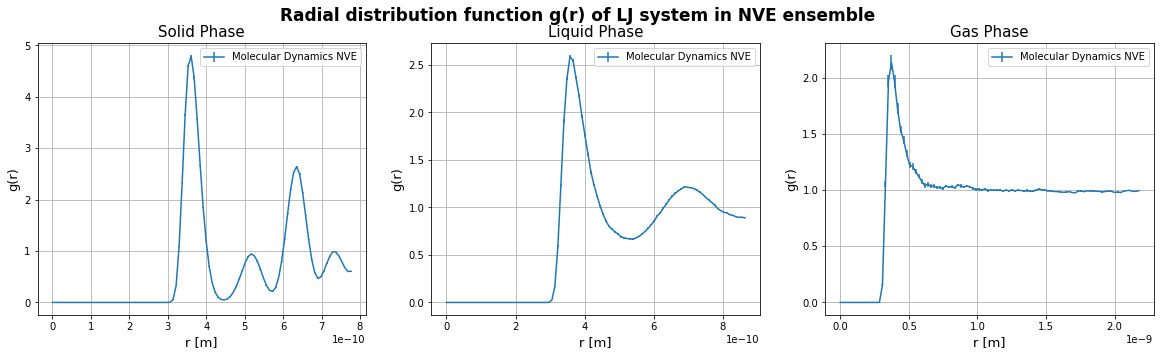

In [11]:
r_solid_NVE,gdir_solid_NVE,error_gdir_solid_NVE = np.loadtxt("Results/output.gave_solid_NVE", usecols=(0,1,2), unpack='true')
r_liquid_NVE,gdir_liquid_NVE,error_gdir_liquid_NVE = np.loadtxt("Results/output.gave_liquid_NVE", usecols=(0,1,2), unpack='true')
r_gas_NVE,gdir_gas_NVE,error_gdir_gas_NVE = np.loadtxt("Results/output.gave_gas_NVE", usecols=(0,1,2), unpack='true')
 

fig1=plt.figure(figsize=(20,5))
plt.suptitle("Radial distribution function g(r) of LJ system in NVE ensemble", fontsize=17, weight = 'bold')

plt.subplot(131)
plt.title("Solid Phase", size=15)
plt.errorbar(r_solid_NVE*sigma,gdir_solid_NVE,yerr=error_gdir_solid_NVE,label = "Molecular Dynamics NVE")
plt.xlabel('r [m]', size=13)
plt.ylabel('g(r)', size=13)
plt.grid(True)
plt.legend()
                                                       
plt.subplot(132)
plt.title("Liquid Phase", size=15)
plt.errorbar(r_liquid_NVE*sigma,gdir_liquid_NVE,yerr=error_gdir_liquid_NVE,label = "Molecular Dynamics NVE")
plt.xlabel('r [m]', size=13)
plt.ylabel('g(r)', size=13)
plt.grid(True)
plt.legend()
                                                       
plt.subplot(133)
plt.title("Gas Phase", size=15)
plt.errorbar(r_gas_NVE*sigma,gdir_gas_NVE,yerr=error_gdir_gas_NVE,label = "Molecular Dynamics NVE")
plt.xlabel('r [m]', size=13)
plt.ylabel('g(r)', size=13)
plt.grid(True)
plt.legend()

plt.show()

- Si osservi che i plot della funzione di distribuzione radiale nell'ensemble *microcanonico* sono **indintinguibili** da quelli nell'ensemble *canonic*o per condizioni termodinamiche simili. 

### Esercizio 7.04

Nell'ultima parte di questa esercitazione si esegue l'effettiva simulazione MC dell'**Argon** secondo il modello del sistema LJ nell'ensemble canonico NVT, scegliendo come configurazioni iniziali quelle salvate dopo aver equilibrato il sistema, nelle tre condizioni termodinamiche riportate nella prima sezione di questa analisi. 

In seguito alle considerazioni espresse nel paragrafo *Esercizio 7.01* si è scelto di effettuare la simulazione con un numero di blocchi pari a $N_{solido}=100$, $N_{liquido}=100$, $N_{gas}=100$ e un numero di step MC per blocco pari a $L_{solido}=1000$, $L_{liquido}=1500$, $L_{gas}=700$ (per quanto detto nelle sezioni precedenti).

Qui di seguito sono riportati i grafici che mostrano i valori medi ottenuti con le relative incertezze statistiche, con il *blocking method*, (per tutte le fasi) dell'energia potenziale per particella $\frac{U}{N}$ e pressione $P$ in funzione del numero di blocchi in cui è suddivisa la simulazione. Inoltre sono riportati nell'ultima colonna plots che confrontano i risultati ottenuti per la $g(r)$ rispettivamente nelle simulazioni MC (*Esercizio 7.02*) e nelle simulazioni di dinamica molecolare (*Esercizio 7.03*) in modo che la temperatura $T$ a cui avviene la prima  simulazione coincida, per le tre fasi termodinamiche, con quella media usata per la simulazione in NVE.

I risultati sono poi convertiti in unità del **Sistema Internazionale** note le seguenti unità di LJ che caratterizzano l'elemento Argon: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu.


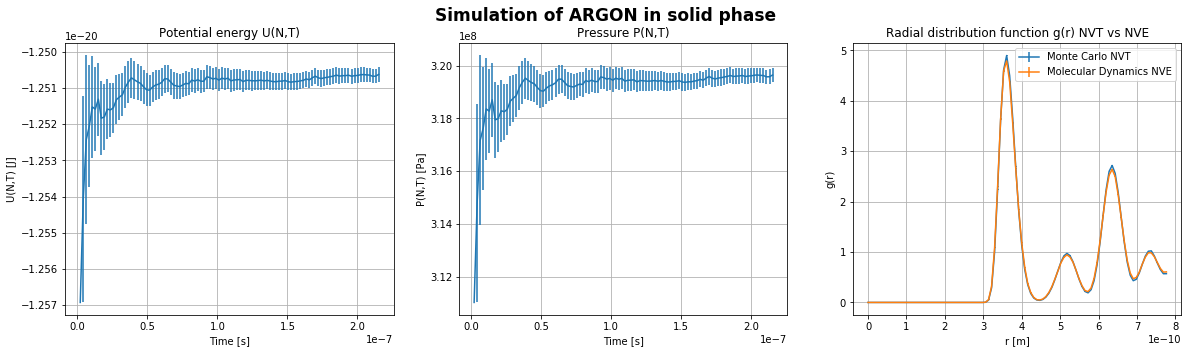

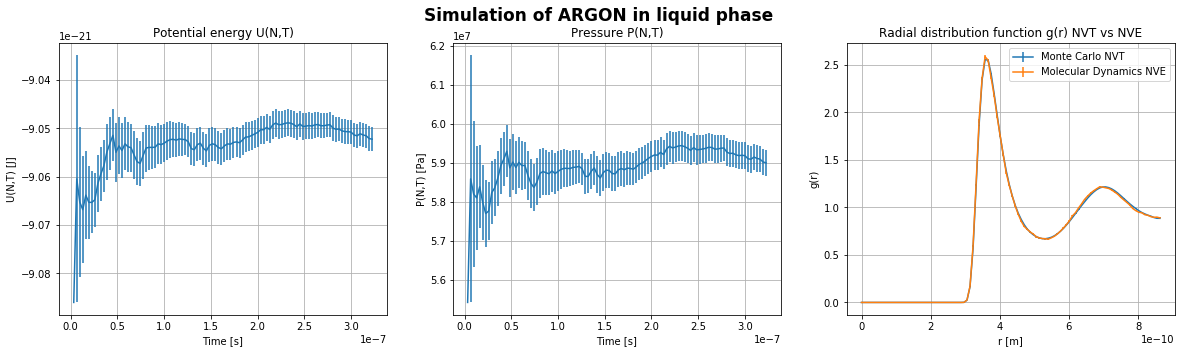

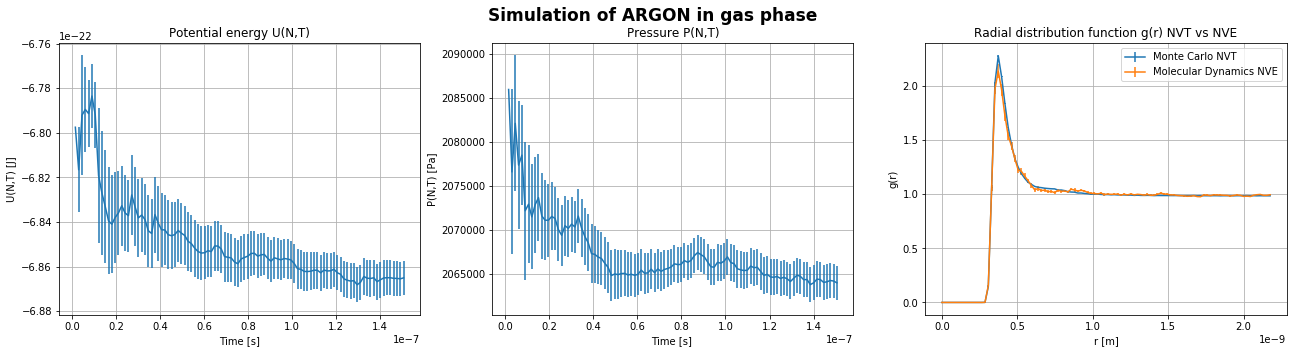

In [12]:
m = 39.948*1.66053873*(10**(-27)) # kg, unità di massa LJ
K_b = 1.380649*(10**(-23)) # j/K , costante di Boltzmann LJ
epsilon = 120*K_b # J, unità di energia LJ
t = sigma*math.sqrt(m/epsilon) # s , unità di tempo LJ
P = epsilon/(sigma**3) # Pa, unità di pressione LJ

#solid
Nblocks_solid,epot_solid, error_epot_solid = np.loadtxt("Results/output.epot_solid", usecols=(0,2,3), unpack='true')
Nblocks_solid,pres_solid, error_pres_solid = np.loadtxt("Results/output.pres_solid", usecols=(0,2,3), unpack='true')
r_solid_NVT,gdir_solid_NVT,error_gdir_solid_NVT = np.loadtxt("Results/output.gave_solid_NVT", usecols=(0,1,2), unpack='true')
r_solid_NVE,gdir_solid_NVE,error_gdir_solid_NVE = np.loadtxt("Results/output.gave_solid_NVE", usecols=(0,1,2), unpack='true')

#liquid
Nblocks_liquid,epot_liquid, error_epot_liquid = np.loadtxt("Results/output.epot_liquid", usecols=(0,2,3), unpack='true')
Nblocks_liquid,pres_liquid, error_pres_liquid = np.loadtxt("Results/output.pres_liquid", usecols=(0,2,3), unpack='true')
r_liquid_NVT,gdir_liquid_NVT,error_gdir_liquid_NVT = np.loadtxt("Results/output.gave_liquid_NVT", usecols=(0,1,2), unpack='true')
r_liquid_NVE,gdir_liquid_NVE,error_gdir_liquid_NVE = np.loadtxt("Results/output.gave_liquid_NVE", usecols=(0,1,2), unpack='true')

#gas
Nblocks_gas,epot_gas, error_epot_gas = np.loadtxt("Results/output.epot_gas", usecols=(0,2,3), unpack='true')
Nblocks_gas,pres_gas, error_pres_gas = np.loadtxt("Results/output.pres_gas", usecols=(0,2,3), unpack='true')
r_gas_NVT,gdir_gas_NVT,error_gdir_gas_NVT = np.loadtxt("Results/output.gave_gas_NVT", usecols=(0,1,2), unpack='true')
r_gas_NVE,gdir_gas_NVE,error_gdir_gas_NVE = np.loadtxt("Results/output.gave_gas_NVE", usecols=(0,1,2), unpack='true')


fig1=plt.figure(figsize=(20,5))
plt.suptitle("Simulation of ARGON in solid phase", fontsize=17, weight = 'bold')

#solid
L=1000 #nsteps for each block

plt.subplot(131)
plt.errorbar(Nblocks_solid*L*t,epot_solid*epsilon, yerr=error_epot_solid*epsilon)
plt.title("Potential energy U(N,T)")
plt.xlabel('Time [s]')
plt.ylabel('U(N,T) [J]')
plt.grid(True)

plt.subplot(132)
plt.title("Pressure P(N,T)")
plt.errorbar(Nblocks_solid*L*t,pres_solid*P, yerr=error_pres_solid*P)
plt.xlabel('Time [s]')
plt.ylabel('P(N,T) [Pa]')
plt.grid(True)

plt.subplot(133)
plt.title("Radial distribution function g(r) NVT vs NVE")
plt.errorbar(r_solid_NVT*sigma,gdir_solid_NVT,yerr=error_gdir_solid_NVT,label = "Monte Carlo NVT")
plt.errorbar(r_solid_NVE*sigma,gdir_solid_NVE,yerr=error_gdir_solid_NVE,label = "Molecular Dynamics NVE")
plt.xlabel('r [m]')
plt.ylabel('g(r)')
plt.grid(True)
plt.legend()

plt.show()

fig2=plt.figure(figsize=(20,5))
plt.suptitle("Simulation of ARGON in liquid phase", fontsize=17, weight = 'bold')

#liquid
L=1500 #nsteps for each block

plt.subplot(131)
plt.errorbar(Nblocks_liquid*L*t,epot_liquid*epsilon, yerr=error_epot_liquid*epsilon)
plt.title("Potential energy U(N,T)")
plt.xlabel('Time [s]')
plt.ylabel('U(N,T) [J]')
plt.grid(True)

plt.subplot(132)
plt.title("Pressure P(N,T)")
plt.errorbar(Nblocks_liquid*L*t,pres_liquid*P, yerr=error_pres_liquid*P)
plt.xlabel('Time [s]')
plt.ylabel('P(N,T) [Pa]')
plt.grid(True)

plt.subplot(133)
plt.title("Radial distribution function g(r) NVT vs NVE")
plt.errorbar(r_liquid_NVT*sigma,gdir_liquid_NVT,yerr=error_gdir_liquid_NVT,label = "Monte Carlo NVT")
plt.errorbar(r_liquid_NVE*sigma,gdir_liquid_NVE,yerr=error_gdir_liquid_NVE,label = "Molecular Dynamics NVE")
plt.xlabel('r [m]')
plt.ylabel('g(r)')
plt.grid(True)
plt.legend()

plt.show()

fig3=plt.figure(figsize=(22,5))
plt.suptitle("Simulation of ARGON in gas phase", fontsize=17, weight = 'bold')

#gas
L=700 #nsteps for each block

plt.subplot(131)
plt.errorbar(Nblocks_gas*L*t,epot_gas*epsilon, yerr=error_epot_gas*epsilon)
plt.title("Potential energy U(N,T)")
plt.xlabel('Time [s]')
plt.ylabel('U(N,T) [J]')
plt.grid(True)

plt.subplot(132)
plt.title("Pressure P(N,T)")
plt.errorbar(Nblocks_gas*L*t,pres_gas*P, yerr=error_pres_gas*P)
plt.xlabel('Time [s] ')
plt.ylabel('P(N,T) [Pa]')
plt.grid(True)

plt.subplot(133)
plt.title("Radial distribution function g(r) NVT vs NVE")
plt.errorbar(r_gas_NVT*sigma,gdir_gas_NVT,yerr=error_gdir_gas_NVT,label = "Monte Carlo NVT")
plt.errorbar(r_gas_NVE*sigma,gdir_gas_NVE,yerr=error_gdir_gas_NVE,label = "Molecular Dynamics NVE")
plt.xlabel('r [m]')
plt.ylabel('g(r)')
plt.grid(True)
plt.legend()

plt.show()




- Nelle prime due colonne i grafici illustrano tipici (vedi esercitazioni precedenti) andamenti di grandezze termodinamiche in funzione degli step MC della simulazione. Si noti che le forme funzionali sono le medesime dato il modo in cui sono calcolate l'energia potenziale e la pressione (a partire dallla grandezza del viriale).

- Nell'ultima colonna si nota l'evidente **compatibilità** delle funzioni di distribuzione radiale $g(r)$, calcolate simulando l'Argon secondo il modello Lennard-Jones, in condizioni termodinamiche simili (stessa temperatura), rispettivamente nell'ensemble microcanonico NVE con la dinamica molecolare risolvendo le equazioni del moto e nell'ensemble canonico NVT con una simulazione MC campionando il peso di Boltzmann con l'algoritmo di Metropolis. La sostanziale **equivalenza delle proprietà strutturali** studiate suggerisce come metodi molto diversi tra loro alla fine producono configurazioni che, in relazione a correlazioni spaziali, risultano quasi indistinguibili. Da una parte questo conferma l'equivalenza nella scelta degli Ensemble, nell'ambito della meccanica statistica, per studiare le proprietà termodinamiche di specifici sistemi e dall'altra come metodi di campionamento tanto diversi alla fine portino agli stessi risultati.